# To what extent do university rankings on US news correlate with other data about these insitutuions?

### scorecard data from 2016: https://data.world/education/college-scorecard
### rankings data from 2017: https://data.world/education/university-rankings-2017

In [1]:
import pandas as pd
import numpy as np

In [2]:
import sys
sys.path.append('/Users/alice/Code/data_science/pandas_helper')
import df_info

In [3]:
scorecard = pd.read_csv('scorecard.csv', index_col=0)
rankings = pd.read_csv('us_news_university_rankings.csv', encoding='ISO-8859-1')
top_scorecard = scorecard[scorecard['INSTNM'].isin(rankings['Name'])]

In [4]:
top_scorecard.rename(columns={'INSTNM': 'Name'}, inplace=True)

/Users/alice/.local/share/virtualenvs/education-YQATvGOP/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [5]:
# combine both tables into one
uni_df = rankings.merge(top_scorecard, on='Name')

In [6]:
target = uni_df['Rank']
description = uni_df['Description']
city = uni_df['CITY']
uni_df.drop(['Rank', 'Description', 'CITY'], axis=1, inplace=True)

In [7]:
uni_df.head()

,Name,Location,Tuition and fees,In-state,Undergrad Enrollment,UNITID,OPEID,OPEID6,STABBR,INSTURL,...,RET_PTL4,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GT_25K_P6,GRAD_DEBT_MDN_SUPP,GRAD_DEBT_MDN10YR_SUPP,RPY_3YR_RT_SUPP,C150_L4_POOLED_SUPP,C150_4_POOLED_SUPP
0,Princeton University,"Princeton, NJ","$45,320",NaN,"5,402",186131,262700,2627,NJ,www.princeton.edu,...,nan,0.05,0.00,77900,0.792,7500,76.9718280616645,0.8198757764,NaN,0.9686
1,Harvard University,"Cambridge, MA","$47,074",NaN,"6,699",166027,215500,2155,MA,www.harvard.edu,...,nan,0.04,0.23,95500,0.858,6500,66.7089176534426,0.6598639456,NaN,0.97494992453969
2,University of Chicago,"Chicago, IL","$52,491",NaN,"5,844",144050,177400,1774,IL,WWW.UCHICAGO.EDU,...,nan,0.27,0.00,64000,0.822,12500,128.286380102774,0.8679245283,NaN,0.92780345754898
3,Yale University,"New Haven, CT","$49,480",NaN,"5,532",130794,142600,1426,CT,www.yale.edu,...,nan,0.09,0.01,74200,0.822,13774,141.361327962849,0.8765432099,NaN,0.96994092810954
4,Columbia University,"New York, NY","$55,056",NaN,"6,102",190150,270700,2707,NY,www.columbia.edu,...,nan,0.26,0.17,75200,0.835,23000,236.046939389104,0.7725366876,NaN,0.93990765027322


## removing nulls

In [8]:
# scorecard already has location info
uni_df.drop(labels='Location', axis=1, inplace=True)
uni_df['In-state'].fillna(uni_df['Tuition and fees'], inplace=True)

In [9]:
# drop any all-null columns
uni_df = uni_df[uni_df.columns[~uni_df.isnull().all()]]

In [10]:
null_cols = df_info.get_nulls(uni_df)

In [11]:
null_cols[null_cols['percent'] > 0]

,total,percent
ACTWR25,153,65.95
ACTWR75,153,65.95
ACTWRMID,153,65.95
NPT4_PRIV,133,57.33
NPT42_PRIV,133,57.33
NPT41_PRIV,133,57.33
NPT45_PRIV,133,57.33
NPT44_PRIV,133,57.33
NPT43_PRIV,133,57.33
NPT4_PUB,99,42.67


In [12]:
# drop first 3 cols, combine npt priv and pub columns
uni_df.drop(labels=['ACTWR25','ACTWR75','ACTWRMID'], axis=1, inplace=True)

In [13]:
uni_df.drop(labels=['SATWR25','SATWR75','SATWRMID'], axis=1, inplace=True)

In [14]:
# combining private and public columns to remove nulls
npt4 = uni_df['NPT4_PRIV']
npt4.fillna(uni_df['NPT4_PUB'], inplace=True)
for e in [4,41,42,43,44,45]:
    col = f'NPT{e}'
    uni_df[col] = uni_df[col+'_PRIV']
    uni_df[col].fillna(uni_df[col+'_PUB'], inplace=True)

In [15]:
for e in [4,41,42,43,44,45]:
    col = f'NPT{e}'
    uni_df.drop(labels=[col+'_PRIV', col+'_PUB'], axis=1, inplace=True)

In [16]:
# for each missing ACT/SAT measure fill in with median
sat_act = [col for col in uni_df.columns if 'SAT' in col or 'ACT' in col]

In [17]:
for col in sat_act:
    uni_df[col].fillna(uni_df[col].median(), inplace=True)

In [18]:
null_cols = df_info.get_nulls(uni_df)
null_cols[null_cols['percent'] > 0]

,total,percent
RET_PT4,47,20.26


In [19]:
# do schools with nulls have part time students?
uni_df[['Name','PPTUG_EF']][uni_df['RET_PT4'].isnull()]

,Name,PPTUG_EF
0,Princeton University,0.00
1,Harvard University,0.05
2,University of Chicago,0.01
3,Yale University,0.00
5,Stanford University,0.00
6,Massachusetts Institute of Technology,0.01
7,Duke University,0.00
9,Johns Hopkins University,0.01
10,Dartmouth College,0.00
11,California Institute of Technology,0.00


In [20]:
# do schools with 0 have part time students?
uni_df[['Name','PPTUG_EF']][uni_df['RET_PT4']==0]

,Name,PPTUG_EF
20,Georgetown University,0.03
87,Marquette University,0.02
97,Stony Brook University--SUNY,0.06
117,Michigan Technological University,0.06
125,DePaul University,0.14
153,Immaculata University,0.45
177,Lipscomb University,0.10


In [21]:
uni_df['RET_PT4'].describe()

count   185.00
mean      0.59
std       0.24
min       0.00
25%       0.45
50%       0.60
75%       0.75
max       1.00
Name: RET_PT4, dtype: float64

In [22]:
# filling in part time nulls with full time - median difference (0.24)
uni_df['RET_PT4'].fillna(uni_df['RET_PT4'].median(), inplace=True)

## get and fix dtypes

In [23]:
num_cols,cat_cols = df_info.get_num_cat_cols(uni_df)

/Users/alice/Code/data_science/pandas_helper/df_info.py:14: FutureWarning: Conversion of the second argument of issubdtype from `object` to `np.generic` is deprecated. In future, it will be treated as `np.object_ == np.dtype(object).type`.
  cat_cols = [col for col in df.columns if np.issubdtype(df[col].dtype, np.object) and col not in num_cols]


In [24]:
cat_cols = [col for col in cat_cols if col not in num_cols]

In [25]:
cat_cols

['Name',
 'Tuition and fees',
 'In-state',
 'Undergrad Enrollment',
 'STABBR',
 'INSTURL',
 'NPCURL',
 'MD_EARN_WNE_P10',
 'GT_25K_P6',
 'GRAD_DEBT_MDN_SUPP',
 'GRAD_DEBT_MDN10YR_SUPP',
 'RPY_3YR_RT_SUPP',
 'C150_4_POOLED_SUPP']

In [26]:
uni_df['Tuition and fees'].head()

0    $45,320 
1    $47,074 
2    $52,491 
3    $49,480 
4    $55,056 
Name: Tuition and fees, dtype: object

In [27]:
uni_df['Tuition and fees'].replace({'\$':'', ',':''}, inplace=True, regex=True)

In [28]:
uni_df['Tuition and fees'] = uni_df['Tuition and fees'].astype(int)

In [29]:
uni_df['Undergrad Enrollment'].head()

0    5,402
1    6,699
2    5,844
3    5,532
4    6,102
Name: Undergrad Enrollment, dtype: object

In [30]:
uni_df['Undergrad Enrollment'].replace({',':''}, inplace=True, regex=True)
uni_df['Undergrad Enrollment'] = uni_df['Undergrad Enrollment'].astype(int)

In [31]:
uni_df.drop(labels=['INSTURL', 'NPCURL'], axis=1, inplace=True)

In [32]:
uni_df['MD_EARN_WNE_P10'].replace({'\$':'', ',':''}, inplace=True, regex=True)

In [33]:
priv_cols = [col for col in uni_df.columns if uni_df[col].isin(['PrivacySuppressed']).any()]

In [34]:
for col in priv_cols:
    med = uni_df[col][uni_df[col]!='PrivacySuppressed'].astype(float).median()
    uni_df[col].replace({'PrivacySuppressed': med}, inplace=True, regex=True)
    uni_df[col] = uni_df[col].astype(float)

In [35]:
# what cat cols remain
num_cols,cat_cols = df_info.get_num_cat_cols(uni_df)
cat_cols = [col for col in cat_cols if col not in num_cols]
cat_cols

['Name', 'In-state', 'STABBR', 'C150_4_POOLED_SUPP']

In [36]:
uni_df['C150_4_POOLED_SUPP'] = uni_df['C150_4_POOLED_SUPP'].astype(float)

In [37]:
uni_df['In-state'].head()

0    $45,320 
1    $47,074 
2    $52,491 
3    $49,480 
4    $55,056 
Name: In-state, dtype: object

In [38]:
uni_df['In-state'].replace({'\$':'', ',':''}, inplace=True, regex=True)

## drop useless and correlated columns

In [39]:
# ST_FIPS has the same info
uni_df.drop(labels='STABBR', axis=1, inplace=True)

In [40]:
Names = uni_df['Name']

In [41]:
uni_df.drop(['Name', 'UNITID', 'OPEID', 'OPEID6'], axis=1, inplace=True)

In [42]:
# drop columns with only one value
to_drop = [col for col in uni_df.columns if len(uni_df[col].unique())==1]

In [43]:
uni_df.drop(to_drop, axis=1, inplace=True)

In [44]:
may_drop = [col for col in uni_df.columns if len(uni_df[col].unique())==2 
            and (uni_df[col].value_counts() < 10).any()]

In [45]:
for col in may_drop:
    print(uni_df[col].value_counts())

0.00    231
1.00      1
Name: HBCU, dtype: int64
0.00    230
1.00      2
Name: ANNHI, dtype: int64
0.00    230
1.00      2
Name: NANTI, dtype: int64
0.00    231
0.00      1
Name: PCIP25, dtype: int64


In [46]:
# that's few enough to drop
uni_df.drop(may_drop, axis=1, inplace=True)

In [47]:
uni_df.columns

Index(['Tuition and fees', 'In-state', 'Undergrad Enrollment', 'CONTROL',
       'LOCALE', 'AANAPII', 'HSI', 'RELAFFIL', 'SATVR25', 'SATVR75', 'SATMT25',
       'SATMT75', 'SATVRMID', 'SATMTMID', 'ACTCM25', 'ACTCM75', 'ACTEN25',
       'ACTEN75', 'ACTMT25', 'ACTMT75', 'ACTCMMID', 'ACTENMID', 'ACTMTMID',
       'SAT_AVG', 'SAT_AVG_ALL', 'PCIP01', 'PCIP03', 'PCIP04', 'PCIP05',
       'PCIP09', 'PCIP10', 'PCIP11', 'PCIP12', 'PCIP13', 'PCIP14', 'PCIP15',
       'PCIP16', 'PCIP19', 'PCIP22', 'PCIP23', 'PCIP24', 'PCIP26', 'PCIP27',
       'PCIP30', 'PCIP31', 'PCIP38', 'PCIP39', 'PCIP40', 'PCIP41', 'PCIP42',
       'PCIP43', 'PCIP44', 'PCIP45', 'PCIP46', 'PCIP47', 'PCIP48', 'PCIP49',
       'PCIP50', 'PCIP51', 'PCIP52', 'PCIP54', 'UGDS', 'UGDS_WHITE',
       'UGDS_BLACK', 'UGDS_HISP', 'UGDS_ASIAN', 'UGDS_AIAN', 'UGDS_NHPI',
       'UGDS_2MOR', 'UGDS_NRA', 'UGDS_UNKN', 'PPTUG_EF', 'PCTPELL', 'RET_FT4',
       'RET_PT4', 'PCTFLOAN', 'UG25ABV', 'MD_EARN_WNE_P10', 'GT_25K_P6',
       'GRAD_DEBT_M

In [50]:
# the SAT/ACT quartile info will be correlated with medians, dropping
uni_df.drop(['SATVR25', 'SATVR75', 'SATMT25', 'SATMT75', 'ACTCM25', 'ACTCM75', 'ACTEN25',
             'ACTEN75', 'ACTMT25', 'ACTMT75', 'SAT_AVG_ALL'], axis=1, inplace=True)

In [51]:
len(uni_df.columns)

78

## let's try a model

In [52]:
# using random forest because data isn't normalized and there's a lot of ordinal
# and categorical data
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
import numpy as np

In [53]:
params = {'n_estimators': [100,200,500,1000], 
          'max_depth': [2,5,10,20,None], 
          'min_samples_leaf': [1,2,5,10], 
          'max_features': ['auto', 'sqrt', 'log2']}

In [54]:
rf = RandomForestRegressor()
model = GridSearchCV(rf, params)
model.fit(uni_df, target)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n

In [55]:
model.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [56]:
model.best_score_

-7.934758552974321

In [57]:
rf = RandomForestRegressor(min_samples_leaf=5, max_depth=10)
x_train, x_test, y_train, y_test = train_test_split(uni_df, target, test_size=0.1)
rf.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [58]:
y_pred = rf.predict(x_test)
rf.score(x_train, y_train)

0.9675921373723183

In [59]:
rf.score(x_test, y_test)

0.939139373721399

In [63]:
importances, feature_names = zip(*sorted(zip(rf.feature_importances_, uni_df.columns)))

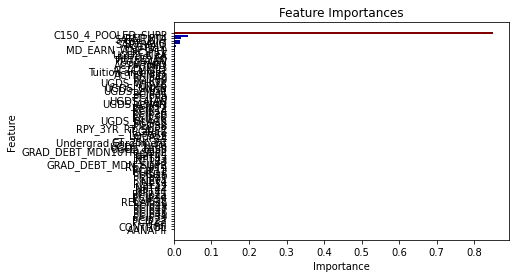

In [64]:
import matplotlib.pyplot as plt
# copied from plots.feature_importances() and fixed an error
plt.figure()
plt.title('Feature Importances')
patches = plt.barh(np.arange(len(feature_names)), importances, color='red', align='center')
plt.yticks(np.arange(len(feature_names)), feature_names)
plt.xlabel('Importance')
plt.ylabel('Feature')

cm = plt.cm.get_cmap('jet')
# idfk how this used to work
# col = importances - min(importances)
# col /= max(col)
max_importance = max(importances)
col = [x/max_importance for x in importances]

for c,p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(c))

plt.show()

In [65]:
for n,i in zip(feature_names, importances):
    print(n,i)

AANAPII 0.0
CONTROL 0.0
HSI 0.0
PCIP12 0.0
PCIP22 0.0
PCIP39 0.0
PCIP41 0.0
PCIP46 0.0
PCIP47 0.0
PCIP48 0.0
PCIP49 0.0
RELAFFIL 0.0
PCIP19 2.6879292670192997e-05
PCIP44 2.7975124599104152e-05
PCIP15 5.997827583551305e-05
NPT41 6.255384480599832e-05
NPT44 6.681869256916782e-05
NPT42 0.00010134672160166278
PCIP54 0.00011099492697403597
NPT4 0.0001331940303263317
PCIP01 0.00013389490321699934
PCIP10 0.00020711815263807292
UGDS 0.00020725123691648598
PCIP11 0.00020918846104921372
PCIP13 0.00021208779348376824
RET_PT4 0.00027655749220282654
GRAD_DEBT_MDN_SUPP 0.00030697929674643225
PCIP23 0.0003183076742836386
NPT43 0.00035492796027420336
NPT45 0.00037013639282976445
PCIP04 0.0003936319943841366
GRAD_DEBT_MDN10YR_SUPP 0.0003951466072592706
UGDS_HISP 0.00040736144341656363
UGDS_NHPI 0.000412119500793773
Undergrad Enrollment 0.00041263558996114695
GT_25K_P6 0.0004154518346440837
PCIP24 0.0004467359116993605
LOCALE 0.00047411117261964166
In-state 0.0006060416785389633
PCIP52 0.000631995920664

In [66]:
# C150_4_POOLED_SUPP
# Completion rate for first-time, full-time students at four-year institutions 
# (150% of expected time to completion) , pooled in two-year rolling averages and 
# suppressed for small n size.

In [67]:
# this is weird. last time i ran this the most important features were about the same,
# but the difference between them was *not* an order of magnitude

In [71]:
import seaborn as sns

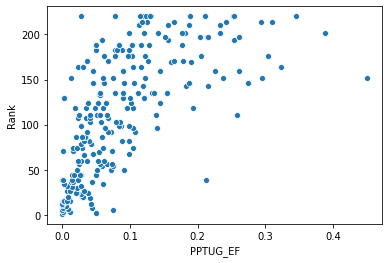

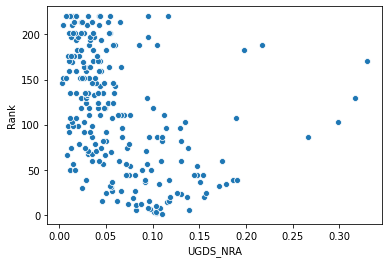

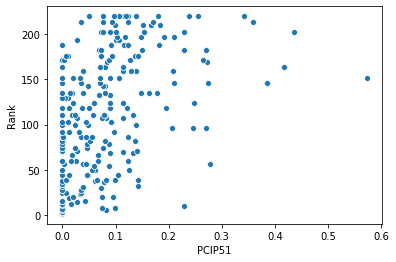

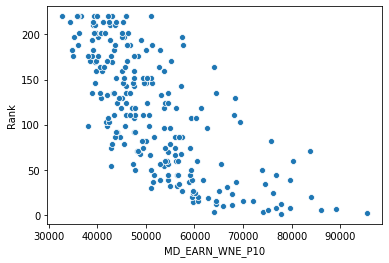

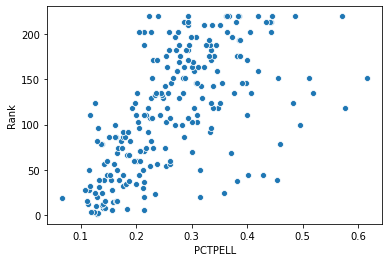

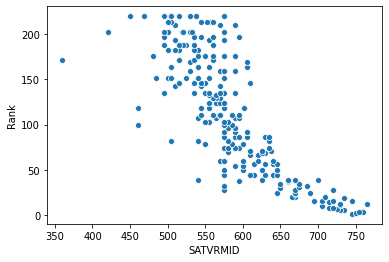

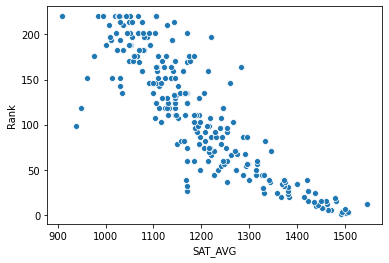

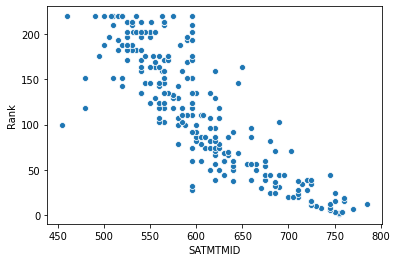

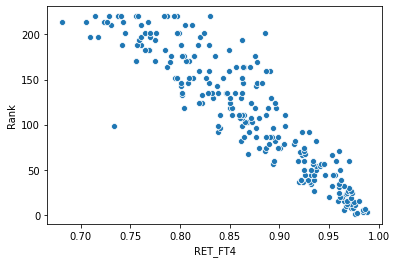

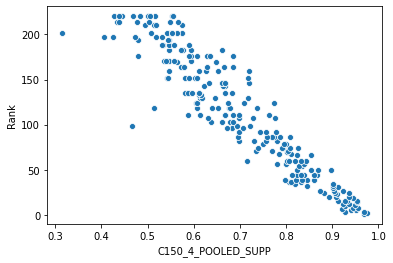

In [75]:
for col in uni_df[list(feature_names[-10:])]:
    sns.scatterplot(uni_df[col], target)
    plt.show()

In [76]:
from scipy.stats import pearsonr

pearsonr(uni_df['C150_4_POOLED_SUPP'], target)

(-0.939464209648718, 5.784737223158431e-109)

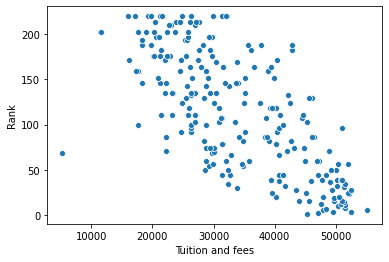

In [89]:
sns.scatterplot(uni_df['Tuition and fees'], target)

## interpretation

That SAT scores are among the most important features in determining college rank is not surprising. It's not terribly surprising that proportion of Pell grant recipients is also important--highly ranked schools take fewer poor students. 

What I find most interesting is the high correlation between completion rate and rank (r^2=-0.94, p~=0). Considering the strength of this relationship, I would like to look at the unranked schools from the scorecard data and see if there are some that are overlooked and maybe deserve more attention based on this metric.

In [94]:
completion = scorecard[['INSTNM','C150_4_POOLED_SUPP']]
# removing for-profit schools
completion = completion[scorecard['CONTROL']!=3]
completion['C150_4_POOLED_SUPP'] = pd.to_numeric(completion['C150_4_POOLED_SUPP'], errors='coerce')
completion.dropna(inplace=True)
completion.sort_values(by='C150_4_POOLED_SUPP', ascending=False, inplace=True)
best = completion[completion['C150_4_POOLED_SUPP']>0.8]
best.reset_index(drop=True, inplace=True)
overlooked = best[~best['INSTNM'].isin(Names)]
overlooked[:20]

,INSTNM,C150_4_POOLED_SUPP
3,Franklin W Olin College of Engineering,0.97
5,Williams College,0.95
9,Amherst College,0.95
11,Pacific Islands University,0.95
14,Pomona College,0.94
16,Middlebury College,0.94
17,Haverford College,0.94
18,Swarthmore College,0.94
23,Bowdoin College,0.93
26,Vassar College,0.93


Almost all of the top schools here, while not appearing on the Top Universities, list, do appear on other top lists by US News:

School | List | Rank
--- | --- | ---
Olin | Undergraduate Engineering Programs | 3
Williams | National Liberal Arts Colleges | 1
Amherst | National Liberal Arts Colleges | 2
Pacific Islands | NA | NA
Pomona | National Liberal Arts Colleges | 5
Middlebury | National Liberal Arts Colleges | 7
Haverford | National Liberal Arts Colleges | 11
Swarthmore | National Liberal Arts Colleges | 3
Bowdoin | National Liberal Arts Colleges | 6
Vassar | National Liberal Arts Colleges | 14

The only exception out of the top 10 is Pacific Islands University, a tiny (double digit student body size), relatively new school in Guam.